In [81]:
import pandas as pd
import numpy as np

In [82]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [83]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [84]:
import missingno as mn
# !pip install missingno 

In [85]:
# mn.bar(train)

In [86]:
# mn.matrix(train)

In [87]:
data = pd.concat([train, test], sort=False)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
User_ID                       783667 non-null int64
Product_ID                    783667 non-null object
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


###  EDA

In [89]:
data.shape

(783667, 12)

In [90]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [91]:
# mn.matrix(data)

In [92]:
data.drop(["User_ID", "Product_ID"], axis =1, inplace = True)

In [93]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 10 columns):
Gender                        783667 non-null object
Age                           783667 non-null object
Occupation                    783667 non-null int64
City_Category                 783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
Marital_Status                783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Purchase                      550068 non-null float64
dtypes: float64(3), int64(3), object(4)
memory usage: 65.8+ MB


In [95]:
data.Stay_In_Current_City_Years.value_counts()

1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

In [96]:
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].str.replace("+","")

In [97]:
data.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

In [98]:
data["Stay_In_Current_City_Years"] = pd.to_numeric(data["Stay_In_Current_City_Years"])

In [99]:
data.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [100]:
data["City_Category"].value_counts()

B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

In [101]:
round(data["Product_Category_2"].isnull().sum()/data.shape[0] * 100, 2)

31.39

In [102]:
round(data["Product_Category_3"].isnull().sum()/data.shape[0] * 100, 2)

69.65

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Occupation,783667.0,8.079300,6.522206,0.0,2.0,7.0,14.0,20.0
Stay_In_Current_City_Years,783667.0,1.858247,1.288790,0.0,1.0,2.0,3.0,4.0
Marital_Status,783667.0,0.409777,0.491793,0.0,0.0,0.0,1.0,1.0
Product_Category_1,783667.0,5.366196,3.878160,1.0,1.0,5.0,8.0,20.0
Product_Category_2,537685.0,9.844506,5.089093,2.0,5.0,9.0,15.0,18.0
Product_Category_3,237858.0,12.668605,4.125510,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [104]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
plt.style.use("seaborn")
sns.set_context("talk")

from scipy.stats import skew

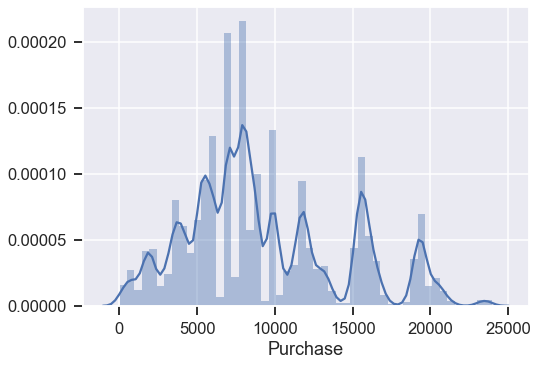

In [105]:
sns.distplot(train["Purchase"])

In [106]:
train["Purchase"].skew() # should be < 0.75

0.6001400037087128

In [107]:
data.skew().sort_values(ascending=False)

Product_Category_1            0.986594
Purchase                      0.600140
Occupation                    0.399767
Marital_Status                0.366914
Stay_In_Current_City_Years    0.318568
Product_Category_2           -0.163941
Product_Category_3           -0.766017
dtype: float64

In [108]:
# data["Occupation"]

In [109]:
data["Product_Category_2"]

0          NaN
1          6.0
2          NaN
3         14.0
4          NaN
          ... 
233594     NaN
233595     8.0
233596     5.0
233597    16.0
233598     5.0
Name: Product_Category_2, Length: 783667, dtype: float64

In [110]:
data["Product_Category_2"] = data["Product_Category_2"].fillna(np.mean(data["Product_Category_2"]))

In [111]:
data["Product_Category_3"] = data["Product_Category_3"].fillna(np.mean(data["Product_Category_3"]))

In [112]:
# np.mean(data["Product_Category_2"])
# data["Product_Category_2"]

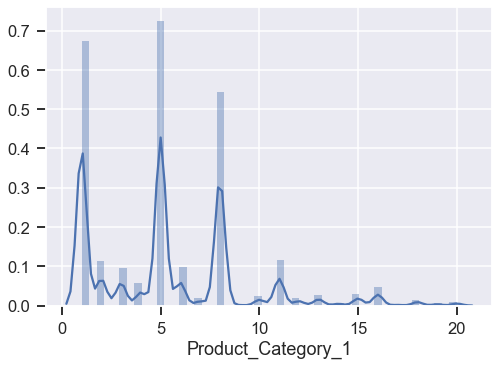

In [113]:
sns.distplot(data["Product_Category_1"])

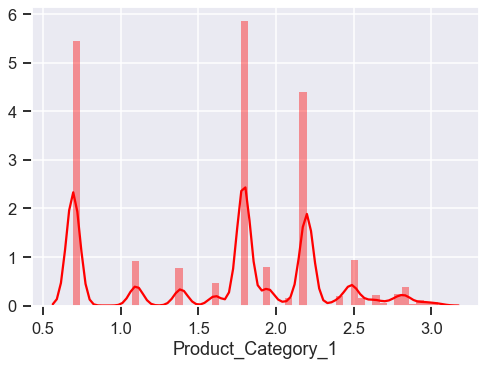

In [114]:
sns.distplot(np.log1p(data["Product_Category_1"]), color="red")

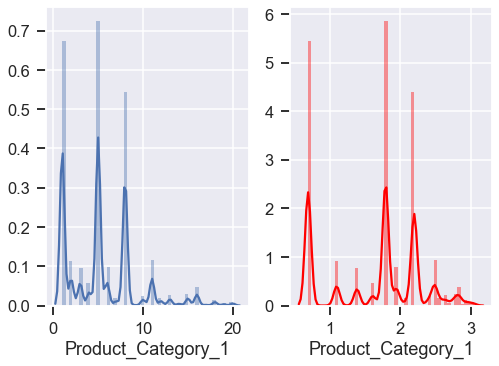

In [115]:
plt.subplot2grid((1,2), (0,0))

sns.distplot(data["Product_Category_1"])

plt.subplot2grid((1,2),(0,1))
sns.distplot(np.log1p(data["Product_Category_1"]), color="red")

In [116]:
data["Occupation"].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

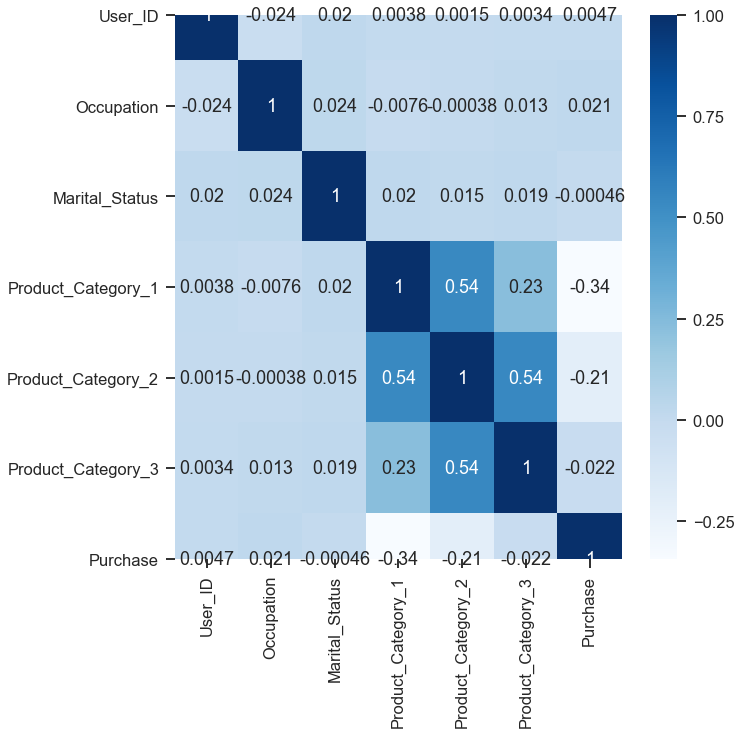

In [117]:
plt.figure(figsize = (10,10))
# mask = 
sns.heatmap(train.corr(), annot=True, cmap="Blues")

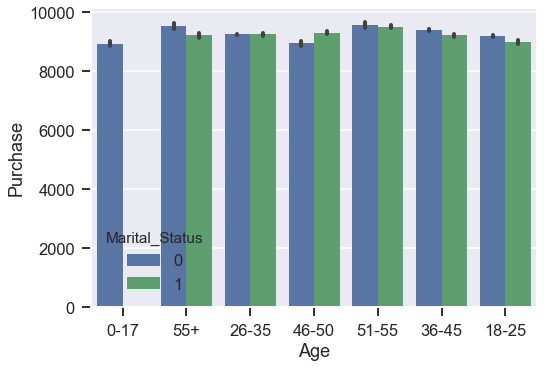

In [118]:
sns.barplot(train["Age"],train["Purchase"], data=train, hue=train["Marital_Status"])

#### Detection of outliers by interquantile range

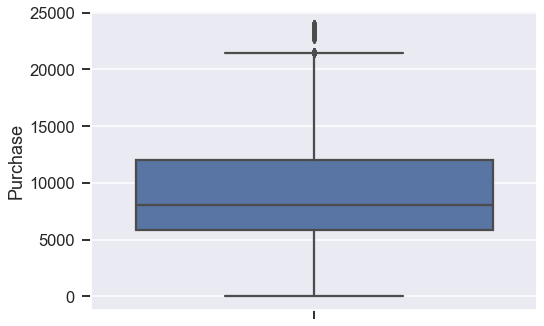

In [119]:
sns.boxplot(train["Purchase"], orient='v')

In [120]:

outlier = []

# def outlier_detector(df):
q1,q3 = np.percentile(train["Purchase"], [25,70])

iqr = q3 - q1

lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

print(lower_bound)
print(upper_bound)

-2734.5
20085.5


In [121]:
len(train[train["Purchase"]>20085.5])

12015

In [125]:
# data[data["Purchase"]>20085]

In [75]:
# data[data["Purchase"] > 20085.5]

In [126]:
# data.drop(data[data["Purchase"] > 20085.5].index, inplace = True)

In [127]:
data.shape

(783667, 10)

In [128]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,9.844506,12.668605,8370.0
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200.0
2,F,0-17,10,A,2,0,12,9.844506,12.668605,1422.0
3,F,0-17,10,A,2,0,12,14.000000,12.668605,1057.0
4,M,55+,16,C,4,0,8,9.844506,12.668605,7969.0


In [129]:
data.Age.value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

In [130]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()

In [131]:
data["Gender"] = le.fit_transform(data["Gender"])

In [132]:
data.Gender.head()

0    0
1    0
2    0
3    0
4    1
Name: Gender, dtype: int32

In [133]:
dummy_city= pd.get_dummies(data['City_Category'])

In [134]:
data.drop(["City_Category"], axis =1, inplace = True)

In [135]:
data

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,2,0,3,9.844506,12.668605,8370.0
1,0,0-17,10,2,0,1,6.000000,14.000000,15200.0
2,0,0-17,10,2,0,12,9.844506,12.668605,1422.0
3,0,0-17,10,2,0,12,14.000000,12.668605,1057.0
4,1,55+,16,4,0,8,9.844506,12.668605,7969.0
...,...,...,...,...,...,...,...,...,...
233594,0,26-35,15,4,1,8,9.844506,12.668605,NaN
233595,0,26-35,15,4,1,5,8.000000,12.668605,NaN
233596,0,26-35,15,4,1,1,5.000000,12.000000,NaN
233597,0,46-50,1,4,0,10,16.000000,12.668605,NaN


In [136]:
dummy_city

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
233594,0,1,0
233595,0,1,0
233596,0,1,0
233597,0,0,1


In [137]:
dummy_city = dummy_city.drop("A", axis = 1)

In [138]:
data = pd.concat([dummy_city, data], axis =1)

In [139]:
data.head()

,B,C,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0-17,10,2,0,3,9.844506,12.668605,8370.0
1,0,0,0,0-17,10,2,0,1,6.000000,14.000000,15200.0
2,0,0,0,0-17,10,2,0,12,9.844506,12.668605,1422.0
3,0,0,0,0-17,10,2,0,12,14.000000,12.668605,1057.0
4,0,1,1,55+,16,4,0,8,9.844506,12.668605,7969.0


In [140]:
age = pd.get_dummies(data["Age"])

In [141]:
age = age.drop(["55+"], axis = 1)

In [142]:
data.drop("Age", axis = 1, inplace = True)

In [143]:
data = pd.concat([age, data], axis = 1)

In [144]:
data["Product_Category_1"] = np.log1p(data["Product_Category_1"]) 

In [145]:
data.head()

,0-17,18-25,26-35,36-45,46-50,51-55,B,C,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,0,0,0,0,0,0,0,10,2,0,1.386294,9.844506,12.668605,8370.0
1,1,0,0,0,0,0,0,0,0,10,2,0,0.693147,6.000000,14.000000,15200.0
2,1,0,0,0,0,0,0,0,0,10,2,0,2.564949,9.844506,12.668605,1422.0
3,1,0,0,0,0,0,0,0,0,10,2,0,2.564949,14.000000,12.668605,1057.0
4,0,0,0,0,0,0,0,1,1,16,4,0,2.197225,9.844506,12.668605,7969.0


In [146]:
data[:train.shape[0]].isnull().sum()

0-17                          0
18-25                         0
26-35                         0
36-45                         0
46-50                         0
51-55                         0
B                             0
C                             0
Gender                        0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [164]:
train2 = data[: train.shape[0]]

In [165]:
train2.shape

(550068, 16)

In [166]:
test2 = data[train.shape[0] :]

In [158]:
import warnings
warnings.filterwarnings("ignore")

In [168]:
train2.drop(train2[train2["Purchase"] > 20085.5].index, inplace = True)

In [169]:
test2.drop(["Purchase"], inplace = True, axis = 1)

In [176]:
# y = train2["Purchase"]

In [177]:
# X.shape

In [178]:
# y.shape

In [180]:
train2.shape

(538053, 16)

In [181]:
test2.shape

(233599, 15)

In [182]:
from sklearn.model_selection import train_test_split

In [184]:
X = train2.drop(["Purchase"], axis =1)

In [186]:
y = train2["Purchase"]

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=33, random_state=942)

### Model

##### Decision Tree regressor 

In [199]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [200]:
pred = model.predict(X_test)

In [202]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

In [203]:
rmse

1890.8196389512568

In [204]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 10)

In [206]:
np.sqrt(-scores).mean() # what the hell

3193.8558731247717

#####  Random Forest regressor

In [207]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [208]:
predictions = model.predict(X_test)

In [209]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

In [210]:
rmse

2050.953220391442